In [1]:
library(sybil)

Loading required package: Matrix

Loading required package: lattice



In [2]:
mp = system.file(package = "sybil", "extdata")

In [3]:
model = readTSVmod(prefix = "Ec_core", fpath = mp, quoteChar = "\"")

reading model description, ... 
OK

reading metabolite list ... 
OK

parsing reaction list ... 
OK

GPR mapping ... 
OK

sub systems ... 
OK

prepare modelorg object ... 
OK

validating object ... 
OK



In [4]:
model # Display the model

model name:             Ecoli_core_model 
number of compartments  2 
                        C_c 
                        C_e 
number of reactions:    95 
number of metabolites:  72 
number of unique genes: 137 
objective function:     +1 Biomass_Ecoli_core_w_GAM 

In [5]:
opt = optimizeProb(model, algorithm = "fba") # Solve the optimization problem
opt

Loading required package: glpkAPI

using GLPK version 5.0



solver:                                   glpkAPI
method:                                   simplex
algorithm:                                fba
number of variables:                      95
number of constraints:                    72
return value of solver:                   solution process was successful
solution status:                          solution is optimal
value of objective function (fba):        0.873922
value of objective function (model):      0.873922

In [6]:
lp_obj(opt)

[1] 0.8739215

In [10]:
ko = optimizeProb(model, gene = "b2276", lb = 0, ub = 0)
ko

solver:                                   glpkAPI
method:                                   simplex
algorithm:                                fba
number of variables:                      95
number of constraints:                    72
return value of solver:                   solution process was successful
solution status:                          solution is optimal
value of objective function (fba):        0.211663
value of objective function (model):      0.211663

In [11]:
del = geneDeletion(model)

compute affected fluxes ... 
OK

calculating 137 optimizations ... 



|            :            |            :            | 100 %
|===================================================| :-) 


OK

Done.



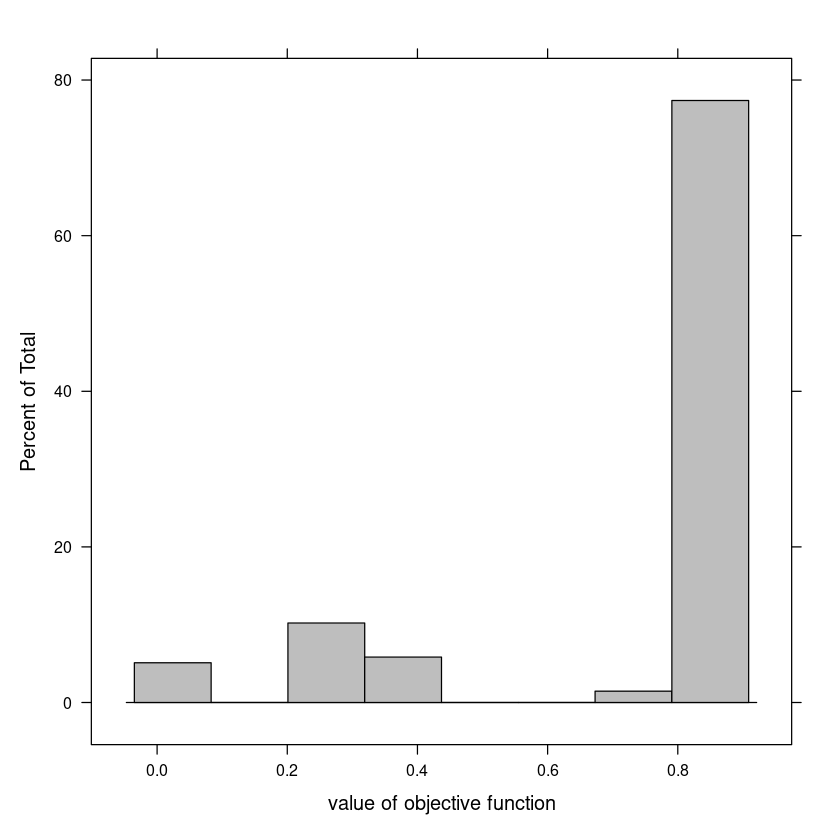

In [12]:
plot(del)

In [14]:
del2 = geneDeletion(model, 2)

compute affected fluxes ... 
OK

calculating 2 optimizations ... 



|            :            |            :            | 100 %
|= = = = = = = = = = = = = = = = = = = = = = = = == = = = = = = = = = = = = = = = = = = = = = = = = =| :-) 


OK

Done.



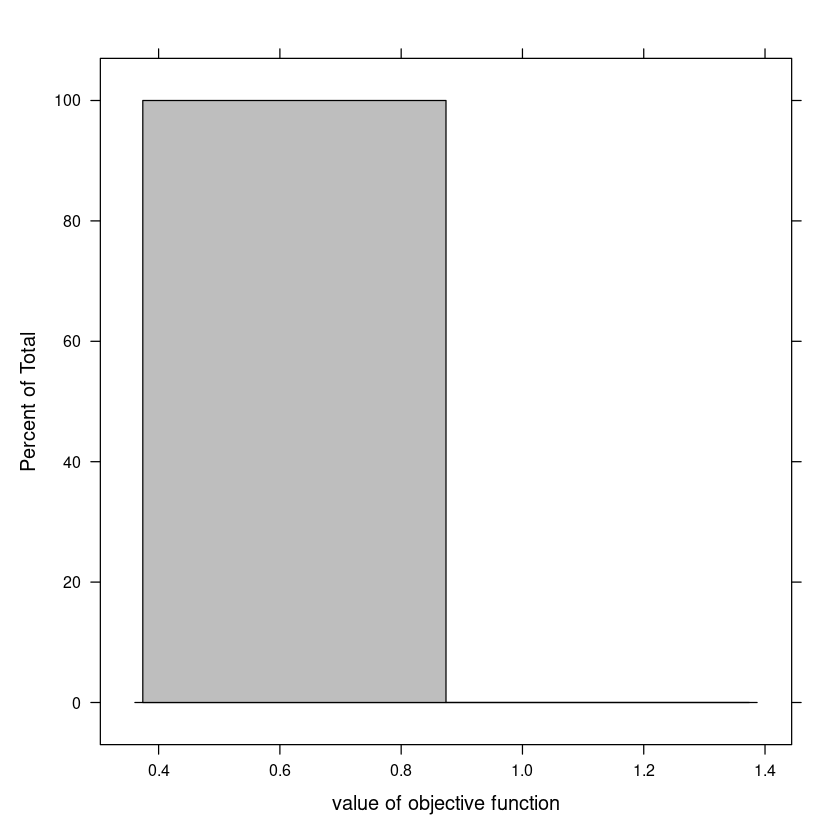

In [15]:
plot(del2)

In [18]:
model2x = changeBounds(model, 'EX_glc(e)', lb = -1)

In [19]:
model2xx = addReact(model, 'NADH_drain', c('nadh[c]', 'nad[c]', 'h[c]'), c
(-1, 1, 1))

In [22]:
model2xxx = changeBounds(model2xx, 'EX_glc(e)', lb = -1000)